Load the dataset

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Load the dataset
iris_data = pd.read_csv("IRIS Flower.csv")

Explore the dataset

In [47]:
# Print the first few rows
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
# Get basic information about the dataset
iris_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


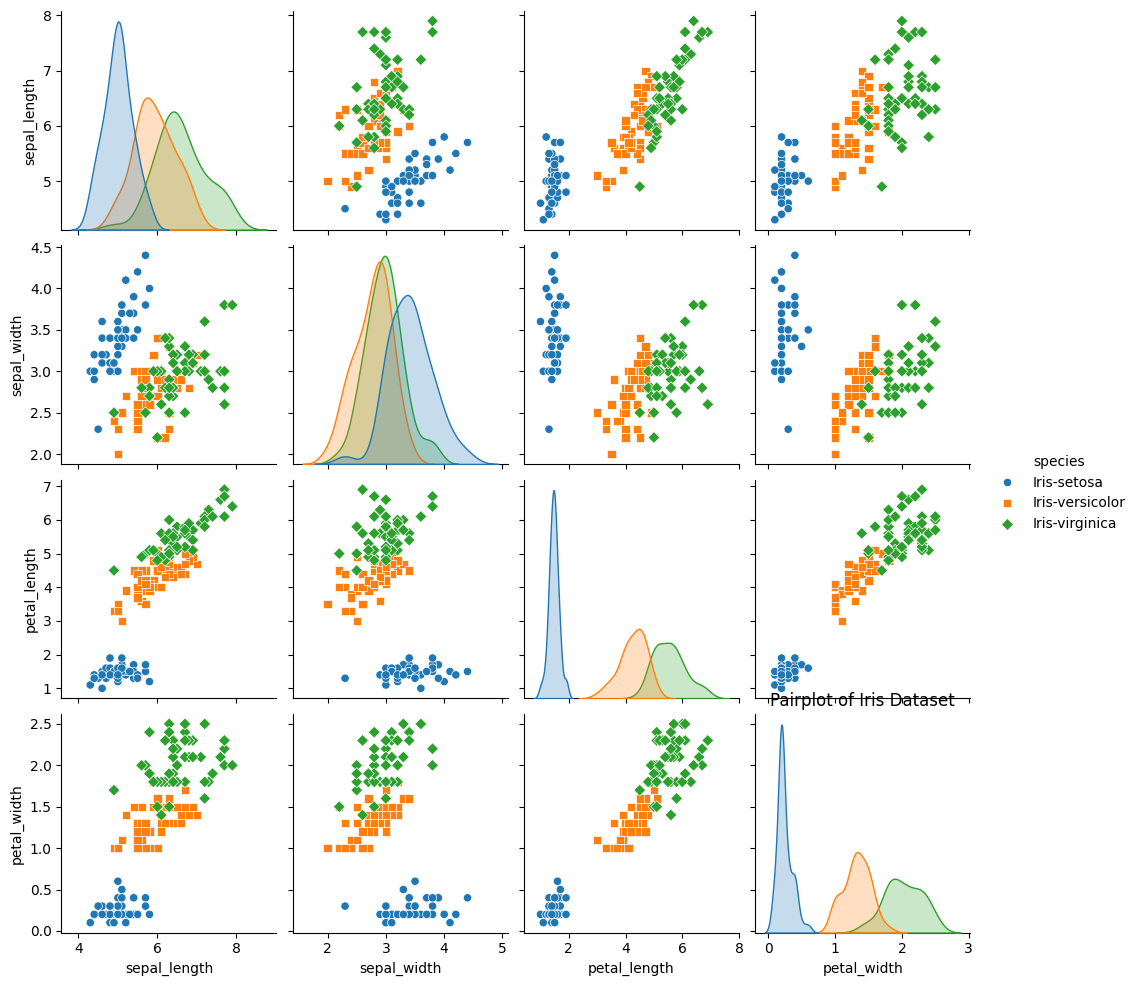

In [50]:
# Plot using seaborn's pairplot
import seaborn as sns
sns.pairplot(iris_data, hue="species", markers=["o", "s", "D"])
plt.title("Pairplot of Iris Dataset")
plt.show()

Preprocess the data

In [51]:
# Split the dataset into features (X) and target (y)
X = iris_data.drop('species', axis=1)
y = iris_data['species']
# Display the first few rows of features and target
print("Features (X):")
print(X.head())

print("\nTarget variable (y):")
print(y.head())

# One-hot encode the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Features (X):
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Target variable (y):
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [53]:
# Calculate the average of each feature for all classes
average_features = iris_data.groupby("species").mean()

# Display the average of each feature
print("Average of each feature for all classes:")
print(average_features)


Average of each feature for all classes:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


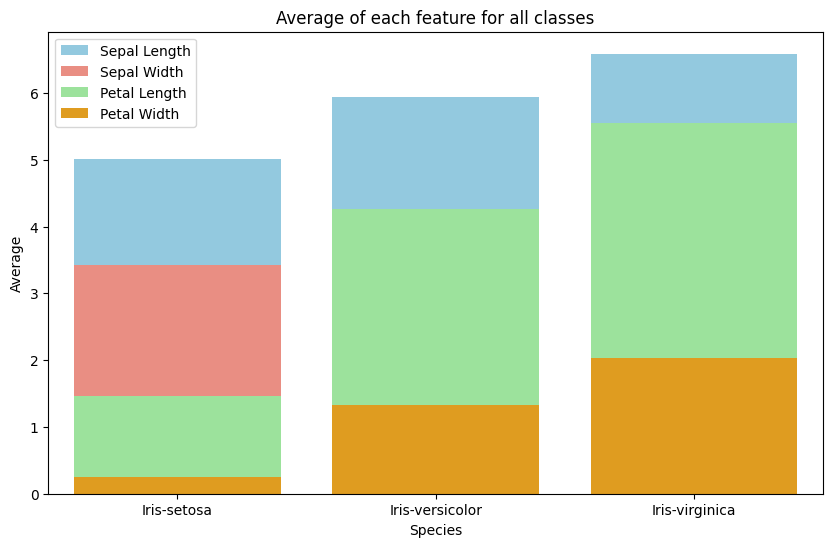

In [54]:

# Calculate the average of each feature for all classes
average_features = iris_data.groupby("species").mean()

# Plot the average of each feature
plt.figure(figsize=(10, 6))
sns.barplot(data=average_features.reset_index(), x="species", y="sepal_length", color="skyblue", label="Sepal Length")
sns.barplot(data=average_features.reset_index(), x="species", y="sepal_width", color="salmon", label="Sepal Width")
sns.barplot(data=average_features.reset_index(), x="species", y="petal_length", color="lightgreen", label="Petal Length")
sns.barplot(data=average_features.reset_index(), x="species", y="petal_width", color="orange", label="Petal Width")
plt.title("Average of each feature for all classes")
plt.xlabel("Species")
plt.ylabel("Average")
plt.legend()
plt.show()

Split the data into training and testing sets

In [55]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (120, 4)
Testing set size: (30, 4)


Train a machine learning model

In [57]:
from sklearn.ensemble import RandomForestClassifier
# Get the feature names
feature_names = X.columns

# Create a random forest classifier
clf = RandomForestClassifier(warm_start=False, random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the model

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [59]:
# Generate a detailed classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Make predictions on new data



In [61]:
# Example new data
new_data = [[5.1, 3.5, 5.4, 1.2]]

# Make a prediction
prediction = clf.predict(new_data)
print(f"Predicted species: {encoder.inverse_transform(prediction)[0]}")

Predicted species: Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
